## Understanding OmniGlot

Resources   
Omniglot paper - http://science.sciencemag.org/content/sci/350/6266/1332.full.pdf  
CS231n - http://cs231n.stanford.edu/reports/2017/pdfs/131.pdf  
Siamese nets paper - http://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf  

## Exploring the dataset

In [3]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys

In [5]:
import torch
import torch.nn as nn

In [6]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [7]:
omniglot_trainset = datasets.Omniglot(root='./omniglot_data/', download=True, background=True, transform=None)

Files already downloaded and verified


In [8]:
omniglot_evalset = datasets.Omniglot(root='./omniglot_data/', download=True, background=False, transform=None)

Files already downloaded and verified


### Explore the background set

In [13]:
len(omniglot_trainset)

19280

In [14]:
len(omniglot_trainset._alphabets), len(omniglot_trainset._characters)

(30, 964)

In [15]:
omniglot_trainset._alphabets

['Gujarati',
 'Korean',
 'Arcadian',
 'Malay_(Jawi_-_Arabic)',
 'Grantha',
 'Blackfoot_(Canadian_Aboriginal_Syllabics)',
 'Balinese',
 'Futurama',
 'N_Ko',
 'Burmese_(Myanmar)',
 'Anglo-Saxon_Futhorc',
 'Mkhedruli_(Georgian)',
 'Latin',
 'Braille',
 'Sanskrit',
 'Japanese_(hiragana)',
 'Tagalog',
 'Greek',
 'Ojibwe_(Canadian_Aboriginal_Syllabics)',
 'Japanese_(katakana)',
 'Early_Aramaic',
 'Hebrew',
 'Tifinagh',
 'Asomtavruli_(Georgian)',
 'Armenian',
 'Syriac_(Estrangelo)',
 'Alphabet_of_the_Magi',
 'Cyrillic',
 'Bengali',
 'Inuktitut_(Canadian_Aboriginal_Syllabics)']

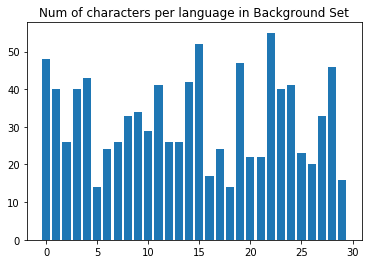

maximum num of characters 55
mean num of characters 32.13
median num of characters 31.0


In [35]:
# background set
per_lang_count = dict()
for a in omniglot_trainset._alphabets:
    per_lang_count['{}'.format(a)] = len(os.listdir(os.path.join(omniglot_trainset.target_folder, a)))
plt.bar(range(len(per_lang_count)), list(per_lang_count.values()))
plt.title('Num of characters per language in Background Set')
plt.show()
print('maximum num of characters {}'.format(max(list(per_lang_count.values()))))
print('mean num of characters {:.2f}'.format(np.mean(list(per_lang_count.values()))))
print('median num of characters {}'.format(np.median(list(per_lang_count.values()))))

class: Hebrew/character09, img shape: (105, 105)


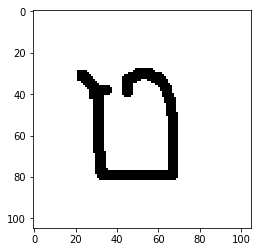

In [17]:
ind = np.random.randint(len(omniglot_trainset))
img, target = omniglot_trainset[ind]
class_name = omniglot_trainset._characters[target]
plt.imshow(np.asarray(img), cmap='gray')
print('class: {}, img shape: {}'.format(class_name, img.size))

### Explore the evaluation set

In [18]:
len(omniglot_evalset)

13180

In [19]:
len(omniglot_evalset._alphabets), len(omniglot_evalset._characters)

(20, 659)

In [20]:
omniglot_evalset._alphabets

['Oriya',
 'ULOG',
 'Tengwar',
 'Malayalam',
 'Atlantean',
 'Keble',
 'Manipuri',
 'Gurmukhi',
 'Tibetan',
 'Aurek-Besh',
 'Ge_ez',
 'Angelic',
 'Old_Church_Slavonic_(Cyrillic)',
 'Kannada',
 'Avesta',
 'Mongolian',
 'Syriac_(Serto)',
 'Atemayar_Qelisayer',
 'Sylheti',
 'Glagolitic']

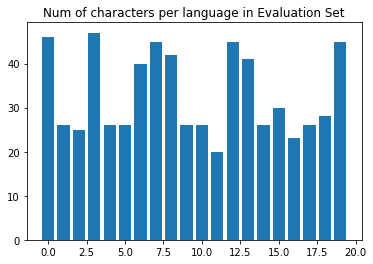

maximum num of characters 47
mean num of characters 32.95
median num of characters 27.0


In [36]:
# evaluation set
eval_per_lang_count = dict()
for a in omniglot_evalset._alphabets:
    eval_per_lang_count['{}'.format(a)] = len(os.listdir(os.path.join(omniglot_evalset.target_folder, a)))
# num_eval_chars = list(eval_per_lang_count.values())
plt.bar(range(len(eval_per_lang_count)), list(eval_per_lang_count.values()))
plt.title('Num of characters per language in Evaluation Set')
plt.show()
print('maximum num of characters {}'.format(max(list(eval_per_lang_count.values()))))
print('mean num of characters {:.2f}'.format(np.mean(list(eval_per_lang_count.values()))))
print('median num of characters {}'.format(np.median(list(eval_per_lang_count.values()))))

class: Tibetan/character35, img shape: (105, 105)


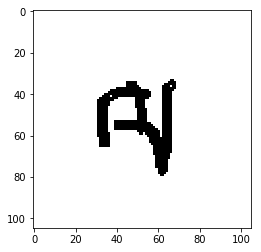

In [22]:
ind = np.random.randint(len(omniglot_evalset))
img, target = omniglot_evalset[ind]
class_name = omniglot_evalset._characters[target]
plt.imshow(np.asarray(img), cmap='gray')
print('class: {}, img shape: {}'.format(class_name, img.size))

# 1 - nearest neighbour from raw pixel values on the training set

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import cv2

In [38]:
def flatten_image(img, size=(32, 32)):
    flat = cv2.resize(img, size).flatten()
    return cv2.normalize(flat, flat, norm_type=cv2.NORM_MINMAX)

In [39]:
flatten_image(np.asarray(img))

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [40]:
rawImages = []
labels = []
for ind, (img, label) in enumerate(omniglot_trainset):
    pixels = flatten_image(np.asarray(img))
    
    rawImages.append(pixels)
    labels.append(label)
    
    if ind > 0 and ind % 1000 == 0:
        print("[INFO] processed {}/{}".format(ind, len(omniglot_trainset)))

[INFO] processed 1000/19280
[INFO] processed 2000/19280
[INFO] processed 3000/19280
[INFO] processed 4000/19280
[INFO] processed 5000/19280
[INFO] processed 6000/19280
[INFO] processed 7000/19280
[INFO] processed 8000/19280
[INFO] processed 9000/19280
[INFO] processed 10000/19280
[INFO] processed 11000/19280
[INFO] processed 12000/19280
[INFO] processed 13000/19280
[INFO] processed 14000/19280
[INFO] processed 15000/19280
[INFO] processed 16000/19280
[INFO] processed 17000/19280
[INFO] processed 18000/19280
[INFO] processed 19000/19280


In [41]:
rawImages = np.array(rawImages)
labels = np.array(labels)
print("[INFO] pixels matrix: {:.2f}MB".format(rawImages.nbytes / (1024 * 1000.0)))

[INFO] pixels matrix: 19.28MB


In [42]:
(trainRI, testRI, trainRL, testRL) = train_test_split(rawImages, labels, test_size=0.25, random_state=1791387)

In [43]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(trainRI, trainRL)

[INFO] evaluating raw pixel accuracy...


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [50]:
print("[INFO] evaluating raw pixel accuracy...")
acc = model.score(testRI, testRL)
print("[INFO] raw pixel accuracy: {:.2f}%".format(acc * 100))

[INFO] evaluating raw pixel accuracy...
[INFO] raw pixel accuracy: 11.04%


## Demo classification run from lake

In [ ]:
# !cd one-shot-classification/all_runs/
!python one-shot-classification/all_runs/demo_classification.py

One-shot classification demo with Modified Hausdorff Distance
 run 1 (error 45.0%)
